In [17]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

pdr.get_data_yahoo = yf.download
start_dt = dt.datetime(2020, 1, 1)
end_dt = dt.datetime.now()

In [18]:
samsung = pdr.get_data_yahoo("005930.KS", start=start_dt, end=end_dt)
samsung

/var/folders/nk/s4x3th851w574ph7qygky7xc0000gn/T/ipykernel_41998/2127342134.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  samsung = pdr.get_data_yahoo("005930.KS", start=start_dt, end=end_dt)
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS
Date,,,,,
2020-01-02,48208.390625,48907.062953,48033.722543,48470.392748,12993228
2020-01-03,48470.390625,49431.065034,47946.386402,48907.060811,15422255
2020-01-06,48470.390625,48557.724662,47684.384291,47946.386402,10278951
2020-01-07,48732.386719,49256.390877,48557.718666,48645.052692,10009778
2020-01-08,49605.730469,50129.734664,48819.724176,49081.726274,23501171
...,...,...,...,...,...
2025-06-25,61300.000000,61600.000000,60300.000000,61500.000000,23933612
2025-06-26,60200.000000,61300.000000,59900.000000,61300.000000,19402300


<Axes: xlabel='Date'>

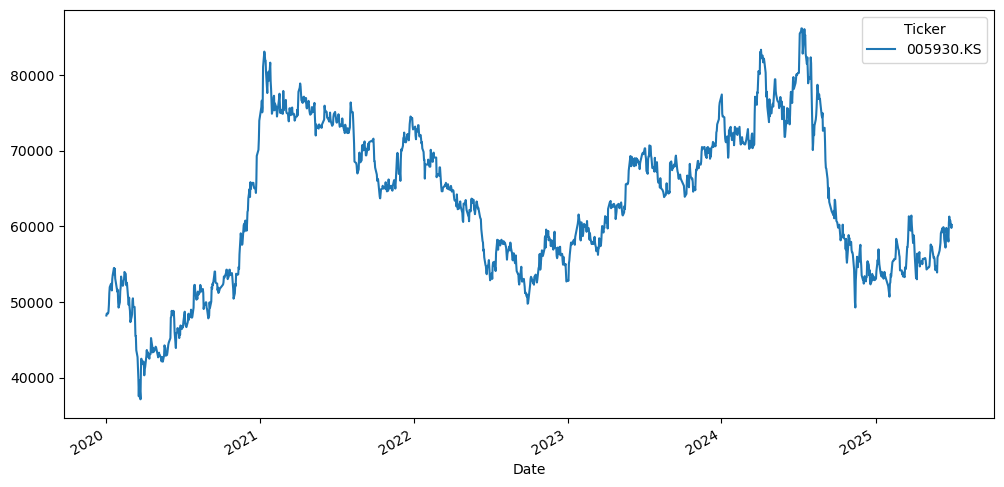

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))
samsung['Close'].plot(ax=ax, label='종가')

In [34]:
samsung_moving_avg_5 = samsung['Close'].rolling(window=5).mean()
samsung_moving_avg_20 = samsung['Close'].rolling(window=20).mean()
samsung_moving_avg_60 = samsung['Close'].rolling(window=60).mean()

df_samsung_moving_avg = pd.concat(
    [samsung['Close'], samsung_moving_avg_5, samsung_moving_avg_20, samsung_moving_avg_60],
    axis=1
)

df_samsung_moving_avg.columns = ['Close', 'SMA_5', 'SMA_20', 'SMA_60']

df_samsung_moving_avg = df_samsung_moving_avg.dropna()

df_samsung_moving_avg.plot(ax=ax, label=['Close','5일', '20일', '60일 이동평균'])

df_samsung_moving_avg

,Close,SMA_5,SMA_20,SMA_60
Date,,,,
2020-03-27,42182.339844,40907.260938,44177.919922,49048.248437
2020-03-30,42097.871094,41903.442969,43881.127344,48946.406445
2020-03-31,42009.886719,42104.753906,43562.468555,48838.731380
2020-04-01,40294.312500,41666.014062,43070.697852,48702.463411
2020-04-02,41174.101562,41551.702344,42605.449609,48576.491992
...,...,...,...,...
2025-06-25,61300.000000,59700.000000,58305.000000,56765.583333
2025-06-26,60200.000000,59900.000000,58620.000000,56745.000000
2025-06-27,60800.000000,60160.000000,58865.000000,56755.000000


Text(0.5, 1.0, 'Centered Moving Averages')

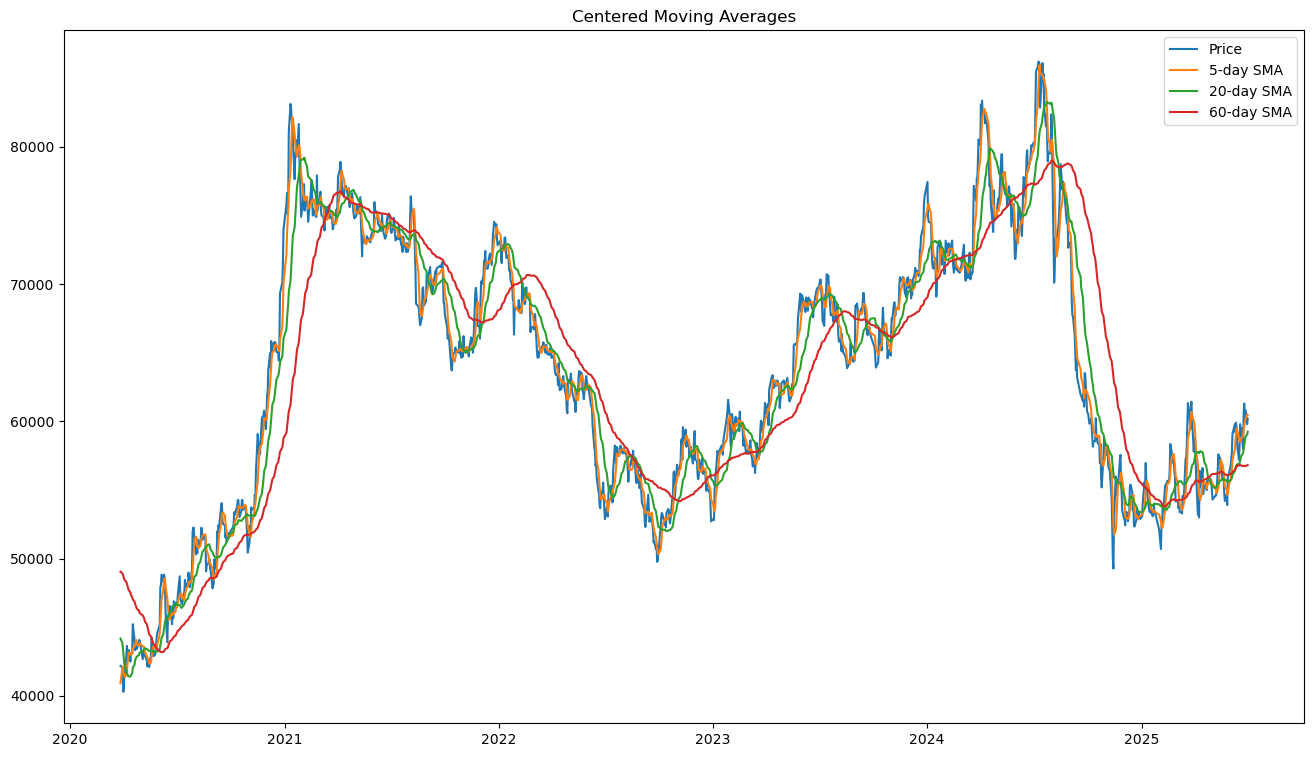

In [38]:
start_date = dt.datetime(2020, 1, 1)
end_date = dt.datetime.now()
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(df_samsung_moving_avg.loc[start_date:end_date, :].index, df_samsung_moving_avg.loc[start_date:end_date, 'Close'], label='Price')
ax.plot(df_samsung_moving_avg.loc[start_date:end_date, :].index, df_samsung_moving_avg.loc[start_date:end_date, 'SMA_5'], label='5-day SMA')
ax.plot(df_samsung_moving_avg.loc[start_date:end_date, :].index, df_samsung_moving_avg.loc[start_date:end_date, 'SMA_20'], label='20-day SMA')
ax.plot(df_samsung_moving_avg.loc[start_date:end_date, :].index, df_samsung_moving_avg.loc[start_date:end_date, 'SMA_60'], label='60-day SMA')
ax.legend(loc='best')
ax.set_title('Centered Moving Averages')


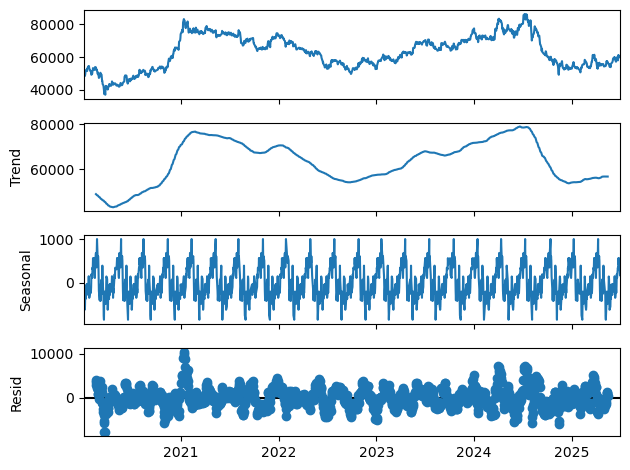

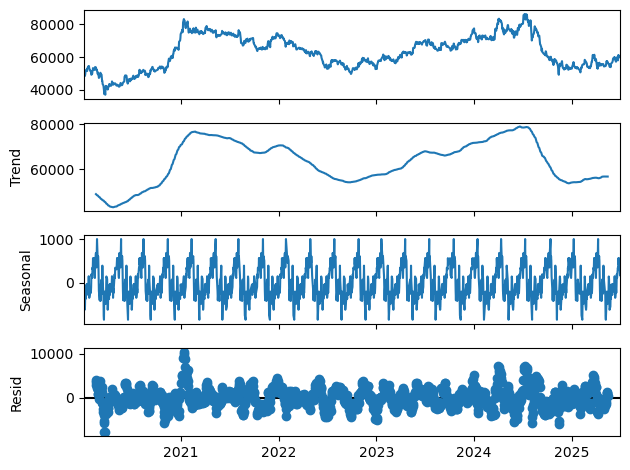

In [40]:
# seasonality 주기 설정
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(samsung['Close'][start_date:], model = 'additive', period = 60)
result.plot()

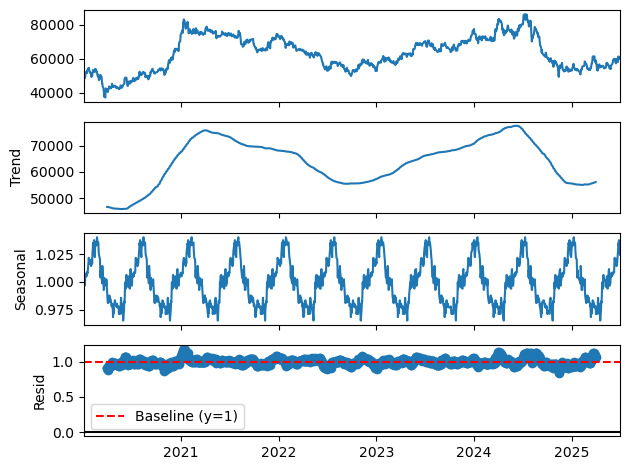

In [ ]:
import matplotlib.pyplot as plt

result = seasonal_decompose(samsung['Close'][start_date:], model='multiplicative', period=120)
fig = result.plot()

residual_ax = fig.axes[3]
residual_ax.axhline(y=1, color='red', linestyle='--', linewidth=1.5, label='Baseline (y=1)')
residual_ax.legend()

# multiplicative로 변경, period를 120으로 설정 -> Residual이 1을 중심으로 패턴 없이 빠르게 움직임 -> multiplicative 모델 additive 모델보다 우수

[[445.24283838]
 [418.22618932]
 [465.31305075]
 [494.95129261]
 [505.4770514 ]
 [573.31519186]
 [663.5985218 ]
 [654.90680741]
 [546.76215811]
 [488.44674802]]


NameError: name 'plot' is not defined

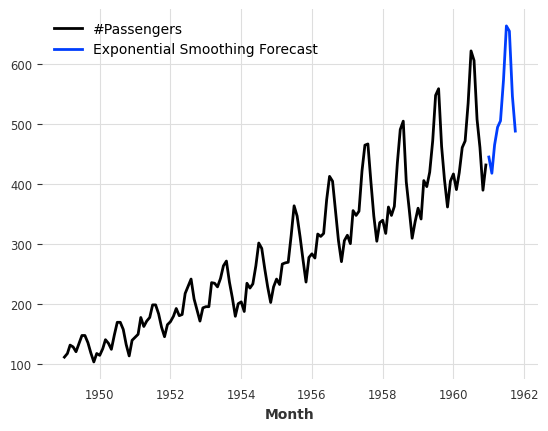

In [ ]:
from darts.datasets import AirPassengersDataset
from darts.models import ExponentialSmoothing
from darts.utils.utils import ModelMode, SeasonalityMode
series = AirPassengersDataset().load()
model = ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.MULTIPLICATIVE)
model.fit(series)
pred = model.predict(10)
print(pred.values())
series.plot()
pred.plot(label='Exponential Smoothing Forecast')